In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df=pd.read_csv("UpdatedResumeDataset.csv")
df

Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]

In [4]:
df.dtypes

Category    object
Resume      object
dtype: object

In [5]:
df.isnull().sum()/df.shape[0]*100

Category    0.0
Resume      0.0
dtype: float64

In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

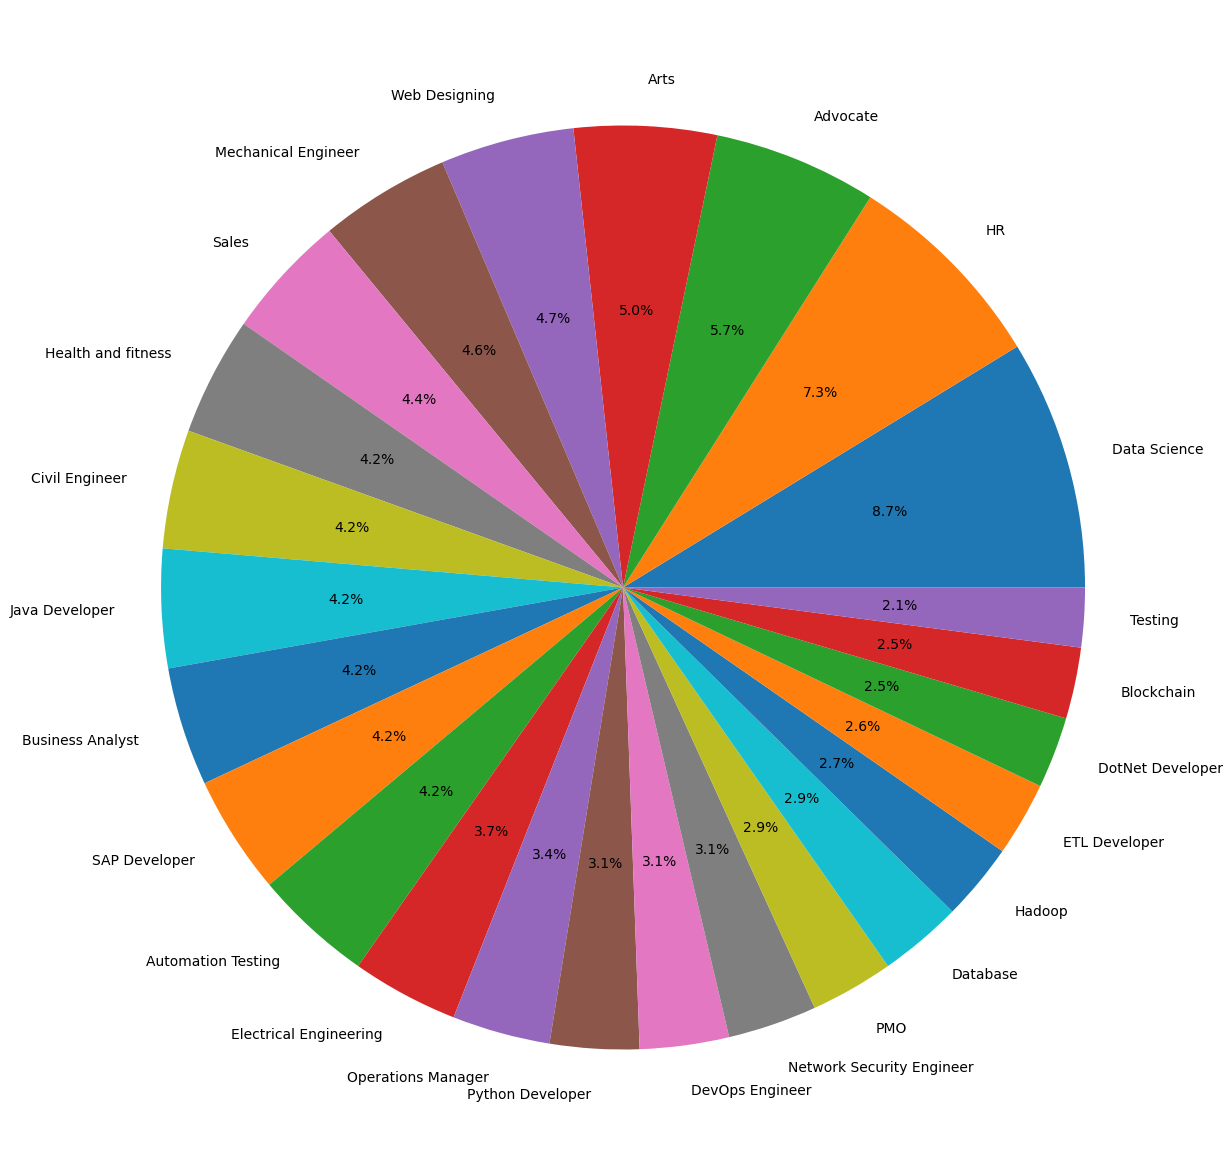

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,15))

plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [8]:
df['Category'][2]

'Data Science'

In [9]:
df['Resume'][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [10]:
#now use first wordCloud
#call wordcloud; inbuilt class
from wordcloud import WordCloud,STOPWORDS

In [11]:
# Create an object of the WordCloud class
my_cloud = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)

In [12]:
my_cloud.generate(''.join(df[df['Category']=='Data Science']['Resume']))

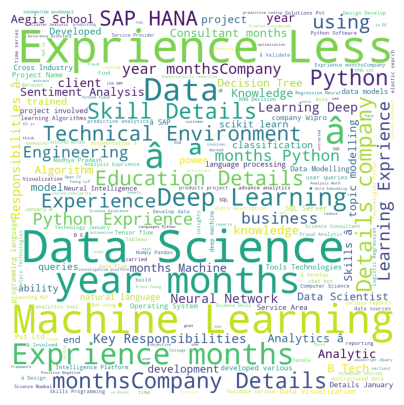

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

In [14]:
#text preprocessing:-
#remove stopwords
#list of stopwords
stop=stopwords.words('english') #user define object

In [15]:
def clean_text(text):           #here clean_text() is a user define passing argument function
    #converting lower case  and then tokenize it
    token=word_tokenize(text.lower())
    #filter only the alphabet use inbuilt functions isalpha() #remove number and special character from text
    word_token=[t for t in token if t.isalpha()] #word token user define list object
    #remove stopwords
    #use list comphrension
    print(token)
    print(word_token)
    clean_tokens=[t for t in word_token if t not in stop] 
    
    print(clean_tokens)
    #next step of preprocessing :Lemmanitzation
    
    #create object of WordnetLemmanitzater class
    lemma=WordNetLemmatizer()
    lemmatized_token=[lemma.lemmatize(t) for t in clean_tokens]
    return " ".join(lemmatized_token)

In [16]:
df["Resume"]=df['Resume'].apply(clean_text)

['skills', '*', 'programming', 'languages', ':', 'python', '(', 'pandas', ',', 'numpy', ',', 'scipy', ',', 'scikit-learn', ',', 'matplotlib', ')', ',', 'sql', ',', 'java', ',', 'javascript/jquery', '.', '*', 'machine', 'learning', ':', 'regression', ',', 'svm', ',', 'naã¯ve', 'bayes', ',', 'knn', ',', 'random', 'forest', ',', 'decision', 'trees', ',', 'boosting', 'techniques', ',', 'cluster', 'analysis', ',', 'word', 'embedding', ',', 'sentiment', 'analysis', ',', 'natural', 'language', 'processing', ',', 'dimensionality', 'reduction', ',', 'topic', 'modelling', '(', 'lda', ',', 'nmf', ')', ',', 'pca', '&', 'neural', 'nets', '.', '*', 'database', 'visualizations', ':', 'mysql', ',', 'sqlserver', ',', 'cassandra', ',', 'hbase', ',', 'elasticsearch', 'd3.js', ',', 'dc.js', ',', 'plotly', ',', 'kibana', ',', 'matplotlib', ',', 'ggplot', ',', 'tableau', '.', '*', 'others', ':', 'regular', 'expression', ',', 'html', ',', 'css', ',', 'angular', '6', ',', 'logstash', ',', 'kafka', ',', 'pytho

['education', 'details', 'may', '2013', 'to', 'may', '2017', 'b.e', 'uit-rgpv', 'data', 'scientist', 'data', 'scientist', '-', 'matelabs', 'skill', 'details', 'python-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'statsmodels-', 'exprience', '-', '12', 'months', 'aws-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'machine', 'learning-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'sklearn-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'scipy-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'keras-', 'exprience', '-', 'less', 'than', '1', 'year', 'monthscompany', 'details', 'company', '-', 'matelabs', 'description', '-', 'ml', 'platform', 'for', 'business', 'professionals', ',', 'dummies', 'and', 'enthusiasts', '.', '60/a', 'koramangala', '5th', 'block', ',', 'achievements/tasks', 'behind', 'sukh', 'sagar', ',', 'bengaluru', ',', 'india', 'developed', 'and', 'deployed', 'auto', 'preprocessing', 'steps', 'of', 'machine', 'le

['skills', 'â\x80¢', 'r', 'â\x80¢', 'python', 'â\x80¢', 'sap', 'hana', 'â\x80¢', 'tableau', 'â\x80¢', 'sap', 'hana', 'sql', 'â\x80¢', 'sap', 'hana', 'pal', 'â\x80¢', 'ms', 'sql', 'â\x80¢', 'sap', 'lumira', 'â\x80¢', 'c', '#', 'â\x80¢', 'linear', 'programming', 'â\x80¢', 'data', 'modelling', 'â\x80¢', 'advance', 'analytics', 'â\x80¢', 'scm', 'analytics', 'â\x80¢', 'retail', 'analytics', 'â\x80¢social', 'media', 'analytics', 'â\x80¢', 'nlp', 'education', 'details', 'january', '2017', 'to', 'january', '2018', 'pgdm', 'business', 'analytics', 'great', 'lakes', 'institute', 'of', 'management', '&', 'illinois', 'institute', 'of', 'technology', 'january', '2013', 'bachelor', 'of', 'engineering', 'electronics', 'and', 'communication', 'bengaluru', ',', 'karnataka', 'new', 'horizon', 'college', 'of', 'engineering', ',', 'bangalore', 'visvesvaraya', 'technological', 'university', 'data', 'science', 'consultant', 'consultant', '-', 'deloitte', 'usi', 'skill', 'details', 'linear', 'programming-', 

['software', 'skills', ':', 'â\x80¢', 'general', 'computer', 'proficiency', 'â\x80¢', 'program', 'langages', 'known', 'c', ',', 'c+', ',', 'java', ',', 'web', 'programming', 'â\x80¢', 'tools', '&', 'software', 'know', 'matlab', '.', 'dbms', 'key', 'strengths', ':', 'â\x80¢', 'posse', "'s", 'good', 'communication', 'and', 'analytic', 'skills', '.', 'â\x80¢', 'positive', 'thinking', '.', 'sincere', ',', 'hard', 'work', ',', 'honesty', ',', 'responsibility', '.', 'â\x80¢', 'enthusiastic', 'to', 'learn', 'new', 'skills', '&', 'take', 'up', 'new', 'tasks', '.', 'â\x80¢', 'self', '-', 'motivated', '.', 'â\x80¢', 'ready', 'to', 'accept', 'challenges', 'education', 'details', 'january', '2014', 'to', 'january', '2017', 'be', 'in', 'computer', 'science', 'and', 'engineering', 'computer', 'science', 'engineering', 'adichunchanagiri', 'institute', 'of', 'technology', 'chikmagalur', 'hr', 'skill', 'details', 'database', 'management', 'system-', 'exprience', '-', '6', 'months', 'dbms-', 'exprience'

['additional', 'qualifications', 'april', '2000', ',', 'web', 'designing', 'course', 'with', 'above', 'average', 'computer', 'skillseducation', 'details', 'january', '2000', 'to', 'january', '2001', 'bachelor', 'of', 'arts', 'sociology', 'mumbai', ',', 'maharashtra', 'the', 'mumbai', 'university', 'january', '1998', 'to', 'january', '2000', 'bachelor', 'of', 'arts', 'sociology', 'sophia', 'college', 'january', '1997', 'to', 'january', '1998', 'h.s.c', '.', 'sophia', 'college', 'january', '1995', 'to', 'january', '1996', 's.s.c', '.', 'st.', 'teresa', "'s", 'convent', 'high', 'school', 'head', 'business', 'development', ',', 'arts', 'head', 'business', 'development', ',', 'arts', 'skill', 'details', 'company', 'details', 'company', '-', 'british', 'council', 'description', '-', 'responsibilities', 'ã±', 'strategic', 'oversight', 'responsibility', 'for', 'programmes', 'in', 'the', 'performing', 'arts', '(', 'music', ',', 'theatre', 'and', 'dance', ')', 'and', 'other', 'cultural', 'sector

['technical', 'skills', 'web', 'technologies', ':', 'angular', 'js', ',', 'html5', ',', 'css3', ',', 'sass', ',', 'bootstrap', ',', 'jquery', ',', 'javascript', '.', 'software', ':', 'brackets', ',', 'visual', 'studio', ',', 'photoshop', ',', 'visual', 'studio', 'code', 'education', 'details', 'january', '2015', 'b.e', 'cse', 'nagpur', ',', 'maharashtra', 'g.h.raisoni', 'college', 'of', 'engineering', 'october', '2009', 'photography', 'competition', 'click', 'nagpur', ',', 'maharashtra', 'maharashtra', 'state', 'board', 'college', 'magazine', 'ocean', 'web', 'designer', 'web', 'designer', '-', 'trust', 'systems', 'and', 'software', 'skill', 'details', 'photoshop-', 'exprience', '-', '28', 'months', 'bootstrap-', 'exprience', '-', '6', 'months', 'html5-', 'exprience', '-', '6', 'months', 'javascript-', 'exprience', '-', '6', 'months', 'css3-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'angular', '4-', 'exprience', '-', 'less', 'than', '1', 'year', 'monthscompany', 'detail

['technical', 'skills', 'web', 'technologies', ':', 'angular', 'js', ',', 'html5', ',', 'css3', ',', 'sass', ',', 'bootstrap', ',', 'jquery', ',', 'javascript', '.', 'software', ':', 'brackets', ',', 'visual', 'studio', ',', 'photoshop', ',', 'visual', 'studio', 'code', 'education', 'details', 'january', '2015', 'b.e', 'cse', 'nagpur', ',', 'maharashtra', 'g.h.raisoni', 'college', 'of', 'engineering', 'october', '2009', 'photography', 'competition', 'click', 'nagpur', ',', 'maharashtra', 'maharashtra', 'state', 'board', 'college', 'magazine', 'ocean', 'web', 'designer', 'web', 'designer', '-', 'trust', 'systems', 'and', 'software', 'skill', 'details', 'photoshop-', 'exprience', '-', '28', 'months', 'bootstrap-', 'exprience', '-', '6', 'months', 'html5-', 'exprience', '-', '6', 'months', 'javascript-', 'exprience', '-', '6', 'months', 'css3-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'angular', '4-', 'exprience', '-', 'less', 'than', '1', 'year', 'monthscompany', 'detail

['education', 'details', 'may', '1999', 'to', 'september', '2002', 'diploma', 'mechanical', 'engg', 'mumbai', ',', 'maharashtra', 'institute', 'of', 'mechanical', 'engg', 'may', '1998', 'to', 'may', '1999', 'diploma', 'mechanical', 'engg', '.', 'services', 'ites', 'may', '1993', 'to', 'may', '1995', 'mumbai', ',', 'maharashtra', 'industrial', 'training', 'institute', 'sr.', 'executive-mechanical', 'engineering-', 'automation', '&', 'projects', 'consultant', 'sr.', 'executive-mechanical', 'engineering-', 'automation', '&', 'projects', 'consultant', '-', 'mechanical', 'engineering', 'skill', 'details', 'microsoft', 'office', '-word', ',', 'excel', ',', 'auto', 'cad', ',', 'micro', 'station', 'j', 'erp', '3d', 'modeling', 'software-', 'exprience', '-', '120', 'monthscompany', 'details', 'company', '-', 'mechanical', 'engineering', 'description', '-', 'role', '&', 'responsibilities', ':', '-', 'application', 'engineering', '/', 'pre', 'sales', '&', 'inside', 'sales', 'â\x80¢', 'provide', '

['education', 'details', 'june', '2014', 'to', 'june', '2018', 'be', 'mechanical', 'engineering', 'pune', ',', 'maharashtra', 'savitribai', 'phule', 'pune', 'university', 'mechanical', 'design', 'engineer', 'mechanical', 'design', 'engineer', 'skill', 'details', 'microsoft', 'office', ',', 'autocad', ',', 'catia', ',', 'solidworks-', 'exprience', '-', '6', 'monthscompany', 'details', 'company', '-', 'push', 'engineering', 'pvt', 'ltd', 'description', '-', 'currently', 'i', 'am', 'working', 'as', 'mechanical', 'design', 'engineer', 'in', 'push', 'engineering', 'pvt', 'ltd.', 'all', 'types', 'of', 'ice', 'making', 'plant', 'are', 'designed', 'and', 'manufactured', 'in', 'our', 'company', '.', 'design', 'includes', 'design', 'of', 'pressure', 'vessel', ',', 'condenser', ',', 'conveyor', 'with', 'the', 'help', 'of', '3d', 'modelling', 'software', '.', 'also', 'bom', 'preparation', 'of', 'material.erp', 'system', '.', 'company', '-', 'central', 'water', 'and', 'power', 'research', 'station'

['key', 'skills', ':', 'â\x80¢', 'planning', '&', 'strategizing', 'â\x80¢', 'presentation', 'skill', 'â\x80¢', 'client', 'relationship', 'â\x80¢', 'energy', 'level', 'â\x80¢', 'enquiry', 'generation', 'â\x80¢', 'achieving', 'targets', 'qualifications', ':', 'a', 'university', 'in', 'marketing', 'or', 'business', 'studies', 'is', 'preferred', 'or', 'a', 'minimum', 'of', 'three', 'years', 'of', 'related', 'experience', 'in', 'sales', '&', 'marketing', 'sector', '.', 'problem', '-', 'solving', 'and', 'analytical', 'skills', 'to', 'interpret', 'sales', 'performance', 'and', 'market', 'trend', 'information', '.', 'proven', 'ability', 'to', 'motivate', 'and', 'lead', 'the', 'sales', 'team', '.', 'experience', 'in', 'developing', 'marketing', 'and', 'sales', 'strategies', '.', 'excellent', 'oral', 'and', 'written', 'communication', 'skills', ',', 'plus', 'a', 'good', 'working', 'knowledge', 'of', 'microsoft', 'office', '.', 'computer', 'knowledge', 'â\x80¢', 'knowledge', 'of', 'ms', 'excel', 

['education', 'details', 'may', '2014', 'diploma', 'nutrition', 'education', 'bengaluru', ',', 'karnataka', 'ignou', 'university', 'june', '2004', 'bachelor', 'of', 'science', 'clinical', 'nutrition', 'and', 'dietetics', 'bengaluru', ',', 'karnataka', 'smt', '.', 'vhd', 'institute', 'of', 'homescience', 'health', 'and', 'wellness', 'coach', 'advance', 'pg', 'diploma', 'in', 'clinical', 'research', ',', 'clinical', 'data', 'management', 'and', 'sas', 'skill', 'details', 'company', 'details', 'company', '-', 'goqii', 'technologies', 'ltd', 'description', '-', 'â\x80¢', 'motivate', 'players', '(', 'i.e', '.', 'goqii', 'subscribers', ')', 'to', 'make', 'a', 'permanent', 'shift', 'to', 'a', 'healthier', 'lifestyle', 'and', 'enhance', 'health', ',', 'nutrition', 'and', 'karma', 'â\x80¢', 'track', 'and', 'analyse', 'player', "'s", 'lifestyle', 'and', 'fitness', 'data', 'captured', 'through', 'the', 'goqii', 'band', '.', 'â\x80¢', 'design', 'custom', 'wellness/fitness', 'goals', 'mutually', 'w

['education', 'details', 'january', '2005', 's.s.c', 'baramati', ',', 'maharashtra', 'm.e.s', '.', 'highschool', 'b.e', '.', 'civil', 'engineering', 'pune', ',', 'maharashtra', 'singhad', 'institute', 'of', 'technology', 'and', 'science', 'civil', 'site', 'engineer', 'civil', 'engineer', 'skill', 'details', 'site', 'engineer-', 'exprience', '-', '60', 'monthscompany', 'details', 'company', '-', 'vasundhara', 'nirmiti', 'properties', 'description', '-', 'civil', 'engineer', 'company', '-', 'shri', 'balaji', 'housing', 'company', 'description', '-', 'execution', 'of', 'all', 'civil', 'work', 'company', '-', 'ganesh', 'construction', 'description', '-', 'site', 'engineer']
['education', 'details', 'january', 'baramati', 'maharashtra', 'highschool', 'civil', 'engineering', 'pune', 'maharashtra', 'singhad', 'institute', 'of', 'technology', 'and', 'science', 'civil', 'site', 'engineer', 'civil', 'engineer', 'skill', 'details', 'site', 'exprience', 'monthscompany', 'details', 'company', 'vasu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['key', 'skills', '-', 'requirement', 'gathering', '-', 'requirement', 'analysis', '-design', 'specifications', '-', 'client', 'communication', '-', 'system', 'documentation', '-', 'problem', 'solving', '-', 'sdlc', 'operating', 'systems', ':', 'windows', 'os', ',', 'unix', '(', 'linux/ubuntu', ')', 'languages', ':', 'java', ',', 'c++', 'web', 'languages', ':', 'javascript', ',', 'html', 'tools', ':', 'citrix', 'software', ',', 'system', 'architect', ',', 'quality', 'center', 'v9.0', '&', 'v10.0', ',', 'tortoise', 'svn', ',', 'doors', ',', 'artifact', 'viewer', ',', 'jformdesigner', ',', 'jira', ',', 'microsoft', 'd365', 'other', 'skills', ':', 'microsoft', 'office', ',', 'ms', 'excel', ',', 'ms', 'powerpoint', ',', 'ms', 'visio', ',', 'autocad', ',', 'vlsi', ',', 'ms-cit', 'certified', '.', 'education', 'details', 'january', '2012', 'be', 'electronics', 'mumbai', ',', 'maharashtra', 'mumbai', 'university', 'january', '2006', 'maharashtra', 'state', 'board', 'business', 'analyst', 'bus

['competencies', ':', 'sap', 'business', 'intelligence', 'version', 'sap', 'bo', '4.2', 'bo', 'tools', 'design', 'studio', ',', 'idt', ',', 'webi', ',', 'udt', ',', 'cmc', 'activities', 'backend', 'db', 'hana', ',', 'bw', ',', 'bex', 'queries', ',', 'sqleducation', 'details', 'sap', 'bo', 'developer', 'and', 'sap', 'hana', 'developer', 'sap', 'bo', 'developer', '-', 'credit', 'suisse', 'skill', 'details', 'sap', 'bi-', 'exprience', '-', '72', 'months', 'cmc-', 'exprience', '-', '72', 'months', 'hana-', 'exprience', '-', '36', 'months', 'business', 'intelligence-', 'exprience', '-', '72', 'months', 'sql-', 'exprience', '-', '72', 'months', 'sap', 'bo-', 'exprience', '-', '72', 'monthscompany', 'details', 'company', '-', 'accenture', 'description', '-', 'company', 'accenture', ',', 'pune', 'environment', 'sap', 'bo', '4.2', ',', 'idt', ',', 'hana', 'views', 'role', 'sap', 'bo', 'developer', 'and', 'hana', 'developer', 'description', ':', 'this', 'project', 'aims', 'to', 'provide', 'repor

['skills', 'agile', 'methodology', 'scrum', ',', 'kanban', ',', 'extreme', 'programming', '(', 'xp', ')', ',', 'test-driven', 'development', '(', 'tdd', ')', 'and', 'feature', 'driven', 'development', '(', 'fdd', ')', 'domain', 'industrial', 'automation', ',', 'retail', ',', 'banking', ',', 'insurance', ',', 'health', 'care', '.', 'automation', 'framework', 'modular', ',', 'data', 'driven', ',', 'bpt', ',', 'hybrid', 'test', 'automation', 'tool', 'hp', 'uft', ',', 'taf', ',', 'load', 'runner', ',', 'selenium', ',', 'rational', 'robot', ',', 'dcmtk', ',', 'sikuli', 'languages', 'vb', 'script', ',', 'c++', ',', 'python', ',', 'shell', 'script', 'bug', 'tracking', 'tool', 'bugzilla', ',', 'jira', ',', 'hp', 'quality', 'control', ',', 'ap', 'test', ',', 'clear', 'quest', 'version', 'management', 'clear', 'case', ',', 'win', 'cvs', ',', 'svn', 'database', 'oracle', ',', 'sql', 'server', ',', 'mysql', 'network', 'protocols', 'tcp/ip', ',', 'http', ',', 'https', ',', 'vpn', ',', 'ftp', ',', '

['education', 'details', 'electronics', 'instrumentation', 'engineering', 'jaunpur', 'uttar', 'pradesh', 'vbs', 'purvanchal', 'university', 'automation', 'tester', 'automation', 'tester', 'tech', 'mahindra', 'skill', 'details', 'company', 'details', 'company', 'tech', 'mahindra', 'description', 'mumbai', 'may', 'present', 'project', 'contribution', 'tech', 'mahindra', 'project', 'title', 'payment', 'gateway', 'jio', 'money', 'role', 'automation', 'tester', 'responsibility', 'analyzing', 'manual', 'test', 'cases', 'create', 'automation', 'scripts', 'working', 'redwood', 'tool', 'automation', 'maintained', 'regression', 'pack', 'per', 'project', 'requirement', 'performed', 'api', 'testing', 'created', 'automation', 'scripts', 'api', 'testing', 'enhancing', 'framework', 'support', 'cross', 'functionality', 'testing', 'execute', 'test', 'cases', 'evaluate', 'test', 'results', 'manual', 'automated', 'testing', 'maintaining', 'scripts', 'per', 'requirement', 'adding', 'new', 'automated', 'te

['education', 'details', 'electrical', 'engineering', 'skill', 'details', 'microsft', 'office', 'and', 'excell', ',', 'power', 'point-', 'exprience', '-', '120', 'monthscompany', 'details', 'company', '-', 'indian', 'navy', 'description', '-', 'academia', 'â\x80¢', 'matric', 'â\x80¢', 'diploma', 'in', 'electrical', 'engineering', 'â\x80¢', 'nuclear', 'biological', 'chemical', 'defence', 'and', 'damage', 'control', 'including', 'fire', 'fighting', 'â\x80¢', 'leadership', 'certificate', 'course', '-', '02', 'weeks', 'â\x80¢', 'management', 'certificate', 'course', '-', '04', 'weeks', 'â\x80¢', 'advance', 'fire', 'fighting', 'including', 'industrial', 'safety', '-', '24', 'weeks']
['education', 'details', 'electrical', 'engineering', 'skill', 'details', 'microsft', 'office', 'and', 'excell', 'power', 'exprience', 'monthscompany', 'details', 'company', 'indian', 'navy', 'description', 'academia', 'matric', 'diploma', 'in', 'electrical', 'engineering', 'nuclear', 'biological', 'chemical', '

['it', 'skills', 'â\x80¢', 'well', 'versed', 'with', 'ms', 'office', 'and', 'internet', 'applications', 'and', 'various', 'erp', 'systems', 'implemented', 'in', 'the', 'company', 'ie.sage', ',', 'flotilla', ',', 'lm', 'erp', ',', 'tally', '9', ',', 'wms', ',', 'exceed', '4000', 'etc', 'personal', 'dossier', 'permanent', 'address', ':', 'bandra', 'west', ',', 'mumbai', '400', '050education', 'details', 'b.com', 'commerce', 'mumbai', ',', 'maharashtra', 'bombay', 'university', 'mumbai', ',', 'maharashtra', 'st.', 'andrews', 'college', 'dim', 'business', 'management', 'ignou', 'operations', 'manager', 'operations', 'manager', '-', 'landmark', 'insurance', 'brokers', 'pvt', 'ltd', 'skill', 'details', 'employee', 'resource', 'group-', 'exprience', '-', '6', 'months', 'enterprise', 'resource', 'planning-', 'exprience', '-', '6', 'months', 'erp-', 'exprience', '-', '6', 'months', 'ms', 'office-', 'exprience', '-', '6', 'months', 'tally-', 'exprience', '-', '6', 'monthscompany', 'details', 'co

['education', 'details', 'august', '2000', 'b.e', 'electronics', 'pune', ',', 'maharashtra', 'pune', 'university', 'operations', 'manager', 'operations', 'manager', '-', 'delta', 'controls', ',', 'dubai', 'fzco', 'skill', 'details', 'company', 'details', 'company', '-', 'delta', 'controls', ',', 'dubai', 'fzco', 'description', '-', 'heading', 'pune', 'branch', '[', 'm/s', 'deltannex', 'integrators', 'pvt', '.', 'ltd.', ']', 'from', 'aug', "'17", 'till', 'date', 'designation', '-', 'operations', 'manager', '[', '1st', 'employee', ']', '1.', 'reporting', 'to', 'the', 'gm-operations', '2.', 'review', 'of', 'sow', ',', 'rfq', ',', 'assist', 'the', 'proposal', 'team', 'on', 'the', 'engineering', 'man', 'hours', ',', 'project', 'schedule', ',', 'organization', 'chart', 'and', 'meeting', 'the', 'client', 'for', 'pre-sales', 'support', '3.', 'review', 'of', 'sow', ',', 'rfq', ',', 'client', "'s", 'purchase', 'order', 'or', 'contract', 'terms', '&', 'conditions', '4.', 'project', 'execution', '

['education', 'details', 'bca', 'vinayaka', 'missions', 'university', 'operations', 'manager', 'operations', 'manager', 'skill', 'details', 'operations', 'exprience', 'less', 'year', 'monthscompany', 'details', 'company', 'bny', 'mellon', 'international', 'operations', 'india', 'pvt', 'ltd', 'description', 'organization', 'bny', 'mellon', 'international', 'operations', 'india', 'pvt', 'sept', 'till', 'date', 'bny', 'mellon', 'provides', 'broad', 'range', 'products', 'services', 'areas', 'investment', 'management', 'investment', 'services', 'treasury', 'services', 'customers', 'institutions', 'corporations', 'individuals', 'well', 'consultants', 'advisors', 'work', 'line', 'business', 'lob', 'revenue', 'billing', 'services', 'r', 'bs', 'revenue', 'billing', 'services', 'global', 'center', 'excellence', 'generates', 'invoices', 'collects', 'fee', 'revenue', 'investment', 'services', 'clients', 'staff', 'across', 'five', 'locations', 'brooklyn', 'pittsburgh', 'syracuse', 'pune', 'uk', 'va

['education', 'details', 'august', '2000', 'b.e', 'electronics', 'pune', ',', 'maharashtra', 'pune', 'university', 'operations', 'manager', 'operations', 'manager', '-', 'delta', 'controls', ',', 'dubai', 'fzco', 'skill', 'details', 'company', 'details', 'company', '-', 'delta', 'controls', ',', 'dubai', 'fzco', 'description', '-', 'heading', 'pune', 'branch', '[', 'm/s', 'deltannex', 'integrators', 'pvt', '.', 'ltd.', ']', 'from', 'aug', "'17", 'till', 'date', 'designation', '-', 'operations', 'manager', '[', '1st', 'employee', ']', '1.', 'reporting', 'to', 'the', 'gm-operations', '2.', 'review', 'of', 'sow', ',', 'rfq', ',', 'assist', 'the', 'proposal', 'team', 'on', 'the', 'engineering', 'man', 'hours', ',', 'project', 'schedule', ',', 'organization', 'chart', 'and', 'meeting', 'the', 'client', 'for', 'pre-sales', 'support', '3.', 'review', 'of', 'sow', ',', 'rfq', ',', 'client', "'s", 'purchase', 'order', 'or', 'contract', 'terms', '&', 'conditions', '4.', 'project', 'execution', '

['education', 'details', 'august', '2000', 'b.e', 'electronics', 'pune', ',', 'maharashtra', 'pune', 'university', 'operations', 'manager', 'operations', 'manager', '-', 'delta', 'controls', ',', 'dubai', 'fzco', 'skill', 'details', 'company', 'details', 'company', '-', 'delta', 'controls', ',', 'dubai', 'fzco', 'description', '-', 'heading', 'pune', 'branch', '[', 'm/s', 'deltannex', 'integrators', 'pvt', '.', 'ltd.', ']', 'from', 'aug', "'17", 'till', 'date', 'designation', '-', 'operations', 'manager', '[', '1st', 'employee', ']', '1.', 'reporting', 'to', 'the', 'gm-operations', '2.', 'review', 'of', 'sow', ',', 'rfq', ',', 'assist', 'the', 'proposal', 'team', 'on', 'the', 'engineering', 'man', 'hours', ',', 'project', 'schedule', ',', 'organization', 'chart', 'and', 'meeting', 'the', 'client', 'for', 'pre-sales', 'support', '3.', 'review', 'of', 'sow', ',', 'rfq', ',', 'client', "'s", 'purchase', 'order', 'or', 'contract', 'terms', '&', 'conditions', '4.', 'project', 'execution', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['skills', 'visa', 'b1-visa', '(', 'usa', ')', 'onsite', 'visits', 'to', 'sweden', '&', 'us', '(', 'seattle', ')', 'education', 'details', 'january', '2013', 'post', 'graduate', 'diploma', 'information', 'technology', 'pune', ',', 'maharashtra', 'symbiosis', 'institute', 'january', '2007', 'bachelor', 'of', 'engineering', 'electronics', 'and', 'telecommunications', 'pune', ',', 'maharashtra', 'pune', 'university', 'cloud', 'operations', 'architect', '(', 'devops', ')', 'cloud', 'operations', 'architect', '(', 'devops', ')', '-', 'devops', 'skill', 'details', 'cloud', 'computing-', 'exprience', '-', '48', 'months', 'shell', 'scripting-', 'exprience', '-', '96', 'months', 'python-', 'exprience', '-', '6', 'months', 'automation-', 'exprience', '-', '72', 'months', 'solution', 'architect-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'azure-', 'exprience', '-', 'less', 'than', '1', 'year', 'months', 'aws-', 'exprience', '-', 'less', 'than', '1', 'year', 'monthscompany', 'detai

['core', 'competencies', 'ant', 'maven', 'git', 'bitbucket', 'jenkins', 'linux', 'ansible', 'shell', 'scripting', 'gathering', 'integration', 'continuous', 'deployment', 'software', 'development', 'life', 'cycle', 'software', 'testing', 'life', 'cycle', 'documentation', 'reporting', 'test', 'reports', 'skills', 'primary', 'skills', 'methodologies', 'programming', 'languages', 'c', 'core', 'java', 'version', 'controls', 'git', 'bitbucket', 'build', 'tools', 'ant', 'maven', 'tools', 'jenkins', 'configuration', 'management', 'ansible', 'scripting', 'shell', 'script', 'application', 'servers', 'apache', 'tomcat', 'servereducation', 'details', 'june', 'june', 'masters', 'science', 'information', 'technology', 'hyderabad', 'telangana', 'jntu', 'devops', 'engineer', 'devops', 'engineer', 'nendrasys', 'technologies', 'pvt', 'ltd', 'skill', 'details', 'exprience', 'months', 'exprience', 'months', 'exprience', 'months', 'change', 'exprience', 'months', 'configuration', 'exprience', 'monthscompan

['communication', 'skills', 'my', 'writing', 'skills', 'in', 'english', 'is', 'very', 'good', 'and', 'i', 'am', 'certainly', 'a', 'clear', 'speaker', '.', 'being', 'comfortable', 'speaking', 'in', 'front', 'of', 'an', 'audience', ',', 'i', 'can', 'easily', 'facilitate', 'meetings', 'and', 'brainstorming', 'sessions', 'interpersonal', 'skills', 'as', 'a', 'friendly', ',', 'polite', 'person', ',', 'with', 'positive', 'attitude', 'i', 'work', 'well', 'with', 'others', 'and', 'deal', 'with', 'difficult', 'situations', 'in', 'a', 'careful', 'and', 'considerate', 'manner', '.', 'learning', 'skills', 'i', 'have', 'a', 'high', 'capacity', 'for', 'learning', ',', 'pick', 'up', 'new', 'skills', 'and', 'ideas', 'quickly', ',', 'and', 'generally', 'thrive', 'on', 'challenges', '.', 'enthusiasm', 'and', 'creativity', 'give', 'me', 'an', 'edge', 'on', 'difficult', 'projects', '.', 'problem', 'solving', 'skills', 'my', 'analytical', 'skills', 'help', 'me', 'troubleshoot', 'problems', 'and', 'uncover'

['skills', 'exceptional', 'communication', 'networking', 'skills', 'successful', 'working', 'team', 'environment', 'well', 'independently', 'ability', 'work', 'pressure', 'strategies', 'campaigns', 'corporate', 'communications', 'mis', 'reporting', 'documentation', 'training', 'development', 'sales', 'support', 'back', 'office', 'operations', 'new', 'process', 'development', 'launch', 'handling', 'customer', 'escalationseducation', 'details', 'bachelor', 'business', 'administration', 'business', 'administration', 'icfai', 'business', 'school', 'integrated', 'institute', 'management', 'technology', 'higher', 'secondary', 'school', 'school', 'delhi', 'delhi', 'senior', 'secondary', 'school', 'delhi', 'public', 'school', 'senior', 'manager', 'pmo', 'skill', 'details', 'exprience', 'months', 'exprience', 'months', 'exprience', 'months', 'exprience', 'months', 'corporate', 'exprience', 'monthscompany', 'details', 'company', 'description', 'review', 'understand', 'existing', 'business', 'pro

['area', 'of', 'expertise', '(', 'profile', ')', 'around', '10', 'plus', 'years', "'", 'proven', 'experience', 'with', 'best', 'global', 'brand', 'wipro', 'with', 'below', 'expertise', ':', '-', 'â\x80¢', 'pmo', 'â\x80¢', 'itil', 'management', 'â\x80¢', 'process', 'improvements', 'â\x80¢', 'project', 'process', 'audits', 'â\x80¢', 'planning', ',', 'scheduling', ',', 'effort/issue/risk', 'tracking', 'â\x80¢', 'risk', '&', 'issue', 'management', 'â\x80¢', 'sla', 'management', 'â\x80¢', 'workforce', '(', 'staffing', ')', 'resource', 'management', '.', 'â\x80¢', 'transition', 'â\x80¢', 'operations', 'management', 'skills', 'project', 'management', 'tools', ':', 'ca', 'clarity', ',', 'visio', 'and', 'office', ',', 'itil', '-incident', 'management', ',', 'recruitment', 'and', 'workforce', 'management', 'technical', ':', 'sap-', 'hr', ',', 'mrs', ',', 'cpro', ',', 'confluence', ',', 'microsoft', 'office', ',', 'word', ',', 'powerpoint.excellent', 'knowledge', '&', 'hands', 'on', 'experience',

['skillset', 'oracle', 'dba', ',', 'mysql', ',', 'mariadb', ',', 'postgresql', 'database', 'administration', 'itskills', 'sql', 'oracle', '10g', ',', '11g', ',', 'mysql', ',', 'mariadb', ',', 'postgresql', 'windows', ',', 'linux', 'putty', 'education', 'details', 'january', '2018', 'mcs', 'pune', ',', 'maharashtra', 'pune', 'university', 'database', 'administrator', 'database', 'administrator', '-', 'infiniteworx', 'omnichannel', 'pvt', '.', 'ltd', 'skill', 'details', 'database-', 'exprience', '-', '17', 'months', 'mysql-', 'exprience', '-', '17', 'months', 'oracle-', 'exprience', '-', '17', 'months', 'sql-', 'exprience', '-', '17', 'months', 'database', 'administration-', 'exprience', '-', '6', 'monthscompany', 'details', 'company', '-', 'infiniteworx', 'omnichannel', 'pvt', '.', 'ltd', 'description', '-', 'pune', 'sept', '2017', 'to', 'present', 'responsibilities', ':', 'â\x80¢', 'creating', 'tablespaces', 'and', 'planning', 'the', 'location', 'of', 'data', ',', 'monitoring', 'the', 

['education', 'details', 'may', '2011', 'to', 'may', '2014', 'bachelor', 'of', 'science', 'information', 'technology', 'mumbai', ',', 'maharashtra', 'mumbai', 'university', 'oracle', 'dba', 'oracle', 'database', 'administrator', 'skill', 'details', 'installation', 'of', 'oracle', 'on', 'rh', 'linux', '&', 'windows', '.', 'creating/managing', 'user', 'profiles', 'and', 'analyzing', 'their', 'privileges', 'and', 'tablespace', 'quotas', 'backup', 'of', 'database', 'logical', 'and', 'physical', 'procedures', '.', 'recovery', 'of', 'database', 'in', 'case', 'of', 'database', 'crash', ',', 'disk/media', 'failure', ',', 'etc', '.', 'standard', 'dba', 'functions', 'like', 'space', 'management', ',', 'rollback', 'segments', ',', 'extents', '.', 'database', 'management', 'and', 'monitoring', 'the', 'database', '.', 'willing', 'to', 'learn', 'new', 'things', '.', 'being', 'a', 'constructive', 'team', 'member', ',', 'contributing', 'practically', 'to', 'the', 'success', 'of', 'the', 'team.-', 'exp

['technical', 'skill', 'set', ':', 'programming', 'languages', 'apache', 'hadoop', ',', 'python', ',', 'shell', 'scripting', ',', 'sql', 'technologies', 'hive', ',', 'pig', ',', 'sqoop', ',', 'flume', ',', 'oozie', ',', 'impala', ',', 'hdfs', 'tools', 'dataiku', ',', 'unravel', ',', 'cloudera', ',', 'putty', ',', 'hue', ',', 'cloudera', 'manager', ',', 'eclipse', ',', 'resource', 'manager', 'initial', 'learning', 'program', ':', 'tata', 'consultancy', 'services', ':', 'june', '2015', 'to', 'august', '2015', 'description', ':', 'this', 'is', 'a', 'learning', 'program', 'conducted', 'by', 'tcs', 'for', 'the', 'newly', 'joined', 'employees', ',', 'to', 'accomplish', 'them', 'to', 'learn', 'the', 'working', 'standard', 'of', 'the', 'organization', '.', 'during', 'this', 'period', 'employee', 'are', 'groomed', 'with', 'various', 'technical', 'as', 'well', 'as', 'ethical', 'aspects', '.', 'education', 'details', 'b.e', '.', 'electronics', '&', 'communication', 'indore', ',', 'madhya', 'prade

['technical', 'skill', 'set', 'big', 'data', 'ecosystems', ':', 'hadoop', ',', 'hdfs', ',', 'hbase', ',', 'map', 'reduce', ',', 'sqoop', ',', 'hive', ',', 'pig', ',', 'spark-core', ',', 'flume', '.', 'other', 'language', ':', 'scala', ',', 'core-java', ',', 'sql', ',', 'plsql', ',', 'sell', 'scripting', 'etl', 'tools', ':', 'informatica', 'power', 'center8.x/9.6', ',', 'talend', '5.6', 'tools', ':', 'eclipse', ',', 'intellij', 'idea', '.', 'platforms', ':', 'windows', 'family', ',', 'linux', '/unix', ',', 'cloudera', '.', 'databases', ':', 'mysql', ',', 'oracle.10/11geducation', 'details', 'm.c.a', 'pune', ',', 'maharashtra', ',', 'in', 'pune', 'university', 'hodoop', 'developer', 'hodoop', 'developer', '-', 'prgx', 'india', 'private', 'limited', 'pune', 'skill', 'details', 'company', 'details', 'company', '-', 'prgx', 'india', 'private', 'limited', 'pune', 'description', '-', 'team', 'size', ':', '10+', 'environment', ':', 'hive', ',', 'spark', ',', 'sqoop', ',', 'scala', 'and', 'flum

['computer', 'skills', ':', '-', 'yes', '.', 'sql', 'knowledge-yes', 'unix', 'knowledge-yes', 'data', 'warehouse', 'knowledge-yes', 'ab', 'intio', '-yee', 'my', 'hobbies', ':', '-', 'â\x80¢', 'playing', 'cricket', ',', 'football', '.', 'â\x80¢', 'reading', 'books', 'â\x80¢', 'visiting', 'new', 'places/travelling', '.', 'declaration', ':', '-', 'i', 'hereby', 'declare', 'that', 'the', 'above', 'mentioned', 'information', 'is', 'factual', 'and', 'correct', 'up', 'to', 'the', 'best', 'of', 'my', 'knowledge', 'and', 'belief', '.', 'date', ':', '-.27.01.2019', 'mr.', 'manish', 'prabhakar', 'patil', 'place', ':', '-mumbai', 'education', 'details', 'june', '2014', 'to', 'june', '2015', 'bachelor', "'s", 'electronics', 'and', 'telecommunication', 'a', 'c', 'patil', 'college', 'of', 'engineering', 'january', '2009', 'to', 'january', '2011', 'engineering', 'navi', 'mumbai', ',', 'maharashtra', 'bharati', 'vidyapeeth', 'january', '2008', 'h.s.c', '.', 'mumbai', ',', 'maharashtra', 'khalsa', 'coll

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['computer', 'proficiency', 'â\x80¢', 'basic', ':', 'ms-office', '(', 'powerpoint', ',', 'word', ',', 'outlook', ',', 'excel', ')', 'â\x80¢', 'language', 'known', ':', 'basics', 'of', 'c', ',', 'cpp', ',', 'java', '.', 'â\x80¢', 'basics', 'of', 'networking', 'â\x80¢', 'basics', 'command', 'of', 'linux', 'project', 'details', 'minor', 'project', 'details', ':', 'â\x80¢', 'title', ':', 'applocker', 'for', 'android', '.', 'â\x80¢', 'project', 'area', ':', 'android', 'application', '.', 'â\x80¢', 'description', ':', 'applocker', 'provides', 'the', 'protection', 'of', 'the', 'system', 'applications', 'as', 'well', 'as', 'the', 'third', 'party', 'applications', 'installed', 'in', 'the', 'android', 'devices', '.', 'the', 'password', 'protection', 'is', 'provided', 'with', 'the', 'help', 'of', 'patterns', 'of', 'volume', 'keys', '.', 'hence', ',', 'an', 'extra', 'measure', 'of', 'privacy', 'is', 'acquired', '.', 'major', 'project', 'details', ':', 'â\x80¢', 'title', ':', 'online', 'complaint',

In [17]:
df

Category                                             Resume
0    Data Science  skill programming language python panda numpy ...
1    Data Science  education detail may may data scientist data s...
2    Data Science  area interest deep learning control system des...
3    Data Science  skill r python sap hana tableau sap hana sql s...
4    Data Science  education detail mca ymcaust faridabad haryana...
..            ...                                                ...
957       Testing  computer skill proficient m office word basic ...
958       Testing  willingness accept challenge positive thinking...
959       Testing  personal skill quick learner eagerness learn n...
960       Testing  computer skill software knowledge point m offi...
961       Testing  skill set o window database mysql sql server l...

[962 rows x 2 columns]

In [18]:
x=df['Resume']
y=df['Category']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lr=LabelEncoder()
y=lr.fit_transform(y)

In [21]:
y

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

In [22]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
tf = TfidfVectorizer()

In [26]:
x_train_tf=tf.fit_transform(x_train) #70% data for training
x_test_tf=tf.transform(x_test)#30% testing data

In [27]:
x_train_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04765173, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
x_test_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
pd.DataFrame(x_train_tf.toarray(),columns=tf.get_feature_names_out())

aaa       aag  aakruti   ab  abacus  abad  abap  abasaheb  abb   ability  \
0    0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
1    0.0  0.047652      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
2    0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
3    0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.027268   
4    0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
..   ...       ...      ...  ...     ...   ...   ...       ...  ...       ...   
668  0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.016962   
669  0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
670  0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
671  0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.000000   
672  0.0  0.000000      0.0  0.0     0.0   0.0   0.0       0.0  0.0  0.050548   

     ...  zaggle  zambia   zd  zeno  zensar  zero  zhypility  zone  zookeeper  \
0    ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
1    ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
2    ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
3    ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
4    ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
..   ...     ...     ...  ...   ...     ...   ...        ...   ...        ...   
668  ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
669  ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
670  ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
671  ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   
672  ...     0.0     0.0  0.0   0.0     0.0   0.0        0.0   0.0        0.0   

      zz  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
..   ...  
668  0.0  
669  0.0  
670  0.0  
671  0.0  
672  0.0  

[673 rows x 6063 columns]

In [30]:
pd.DataFrame(x_test_tf.toarray(),columns=tf.get_feature_names_out())

aaa  aag  aakruti   ab  abacus  abad  abap  abasaheb  abb  ability  ...  \
0    0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
1    0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
2    0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
3    0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
4    0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
..   ...  ...      ...  ...     ...   ...   ...       ...  ...      ...  ...   
284  0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
285  0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
286  0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
287  0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   
288  0.0  0.0      0.0  0.0     0.0   0.0   0.0       0.0  0.0      0.0  ...   

     zaggle  zambia   zd  zeno  zensar      zero  zhypility  zone  zookeeper  \
0       0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
1       0.0     0.0  0.0   0.0     0.0  0.068039        0.0   0.0        0.0   
2       0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
3       0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
4       0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
..      ...     ...  ...   ...     ...       ...        ...   ...        ...   
284     0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
285     0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
286     0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
287     0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   
288     0.0     0.0  0.0   0.0     0.0  0.000000        0.0   0.0        0.0   

      zz  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
..   ...  
284  0.0  
285  0.0  
286  0.0  
287  0.0  
288  0.0  

[289 rows x 6063 columns]

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
# create a user define function :passing argument and returning  value
def create_model(model):
    model.fit(x_train_tf,y_train) #rtrain model with 70% of data
    y_pred=model.predict(x_test_tf) #test the model with 30% of data
    #generate rport 
    print(classification_report(y_test,y_pred))
#confusion matrix
#     print(confusion_matrix(y_test,y_pred))
    return model

In [33]:
dtc=DecisionTreeClassifier()

In [34]:
for i in range(1,26):
    dtc=DecisionTreeClassifier(random_state=i)
    print("randoms state",i)
    dtc=create_model(dtc)
    

randoms state 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17       1.00    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17       1.00    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17       1.00    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17       1.00    

In [35]:
for i in range(1,9):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max Depth",i)
    dtc1=create_model(dtc1)

Max Depth 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         5
          15       0.95      1.00      0.98        21
          16       0.00      0.00      0.00        15
          17   

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00        18
           9       0.00      0.00      0.00         9
          10       1.00      1.00      1.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
for i in range(1,9):
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Max Depth",i)
    dtc2=create_model(dtc2)

Max Depth 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       0.75      1.00      0.86         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      0.78      0.88         9
          10       1.00      1.00      1.00        12
          11       1.00      0.75      0.86         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      0.40      0.57         5
          15       0.95      1.00      0.98        21
          16       1.00      1.00      1.00        15
          17       1.00    

In [37]:
for i in range(1,9):
    dtc3=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print('random_state',i)
    dtc3=create_model(dtc3)

random_state 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         5
          15       0.17      1.00      0.30        21
          16       0.00      0.00      0.00        15
          17

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.35      0.44      0.39        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       0.19      0.87      0.31        15
          13       0.43      1.00      0.60        12
          14       0.00      0.00      0.00         5
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.25      0.57      0.35         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.39      0.58      0.47        12
           7       0.00      0.00      0.00         7
           8       1.00      0.44      0.62        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.00      0.00      0.00         8
          12       0.25      0.87      0.39        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      1.00      0.50        13
           2       0.50      0.57      0.53         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.47      0.58      0.52        12
           7       0.33      0.43      0.38         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       1.00      0.83      0.91        12
          11       0.27      0.38      0.32         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       1.00      1.00      1.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        13
           2       0.88      1.00      0.93         7
           3       0.78      1.00      0.88        18
           4       0.75      0.60      0.67        10
           5       1.00      1.00      1.00         9
           6       1.00      0.58      0.74        12
           7       0.50      0.43      0.46         7
           8       0.94      0.94      0.94        18
           9       1.00      0.22      0.36         9
          10       1.00      0.83      0.91        12
          11       1.00      0.38      0.55         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.19      1.00      0.32         5
          15       1.00      1.00      1.00        21
          16       0.80      0.53      0.64        15
          17       1.00    

In [38]:
for i in range(1,25):
    dtc4=DecisionTreeClassifier(random_state=43,min_samples_leaf=i,criterion='entropy')
    print("random_state",i)
    dtc4=create_model(dtc4)

random_state 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.86      0.86      0.86         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      0.58      0.74        12
           7       0.55      0.86      0.67         7
           8       1.00      0.94      0.97        18
           9       1.00      0.67      0.80         9
          10       0.86      1.00      0.92        12
          11       1.00      1.00      1.00         8
          12       0.88      1.00      0.94        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.79      1.00      0.88        15
          17       1.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.55      0.86      0.67         7
           3       0.67      1.00      0.80        18
           4       0.75      0.90      0.82        10
           5       1.00      1.00      1.00         9
           6       1.00      0.58      0.74        12
           7       0.67      0.29      0.40         7
           8       0.94      0.94      0.94        18
           9       0.56      0.56      0.56         9
          10       0.62      0.83      0.71        12
          11       0.75      0.75      0.75         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.83      1.00      0.91         5
          15       0.95      1.00      0.98        21
          16       1.00      0.73      0.85        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.46      0.86      0.60         7
           3       0.67      1.00      0.80        18
           4       0.75      0.90      0.82        10
           5       1.00      1.00      1.00         9
           6       1.00      0.58      0.74        12
           7       0.67      0.29      0.40         7
           8       0.85      0.94      0.89        18
           9       0.56      0.56      0.56         9
          10       0.62      0.83      0.71        12
          11       0.75      0.75      0.75         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.45      1.00      0.62         5
          15       0.95      1.00      0.98        21
          16       1.00      0.73      0.85        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.46      0.86      0.60         7
           3       0.79      0.83      0.81        18
           4       0.75      0.90      0.82        10
           5       1.00      1.00      1.00         9
           6       1.00      0.58      0.74        12
           7       0.67      0.29      0.40         7
           8       0.85      0.94      0.89        18
           9       0.56      0.56      0.56         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.45      1.00      0.62         5
          15       0.95      1.00      0.98        21
          16       1.00      0.27      0.42        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.55      0.86      0.67         7
           3       0.83      0.83      0.83        18
           4       0.69      0.90      0.78        10
           5       1.00      1.00      1.00         9
           6       1.00      0.50      0.67        12
           7       0.67      0.29      0.40         7
           8       0.85      0.94      0.89        18
           9       0.56      0.56      0.56         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.45      1.00      0.62         5
          15       0.95      1.00      0.98        21
          16       1.00      0.27      0.42        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      1.00      1.00        13
           2       0.55      0.86      0.67         7
           3       0.48      0.56      0.51        18
           4       0.69      0.90      0.78        10
           5       1.00      1.00      1.00         9
           6       1.00      0.50      0.67        12
           7       0.67      0.29      0.40         7
           8       0.85      0.94      0.89        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       1.00      0.27      0.42        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.42      0.71      0.53         7
           3       0.47      0.44      0.46        18
           4       0.67      0.60      0.63        10
           5       1.00      1.00      1.00         9
           6       1.00      0.50      0.67        12
           7       0.67      0.29      0.40         7
           8       0.85      0.94      0.89        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.44      0.27      0.33        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.75      0.60      0.67        10
           5       1.00      1.00      1.00         9
           6       1.00      0.58      0.74        12
           7       0.67      0.29      0.40         7
           8       0.85      0.94      0.89        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.44      0.27      0.33        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.60      0.60      0.60        10
           5       1.00      1.00      1.00         9
           6       1.00      0.42      0.59        12
           7       0.67      0.29      0.40         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.44      0.27      0.33        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.60      0.60      0.60        10
           5       0.00      0.00      0.00         9
           6       1.00      0.42      0.59        12
           7       0.67      0.29      0.40         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.36      0.27      0.31        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.47      0.58      0.52        12
           7       0.67      0.29      0.40         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.26      0.75      0.39         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.36      0.27      0.31        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.47      0.58      0.52        12
           7       0.67      0.29      0.40         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.29      0.75      0.41         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.36      0.27      0.31        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.47      0.58      0.52        12
           7       0.67      0.29      0.40         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.25      0.38      0.30         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.36      0.27      0.31        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.47      0.58      0.52        12
           7       0.67      0.29      0.40         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.25      0.38      0.30         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.95      1.00      0.98        21
          16       0.36      0.27      0.31        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        13
           2       0.20      0.43      0.27         7
           3       0.47      0.44      0.46        18
           4       0.00      0.00      0.00        10
           5       0.64      1.00      0.78         9
           6       0.88      0.58      0.70        12
           7       0.10      0.14      0.12         7
           8       0.74      0.94      0.83        18
           9       0.00      0.00      0.00         9
          10       0.62      0.83      0.71        12
          11       0.19      0.38      0.25         8
          12       1.00      0.87      0.93        15
          13       1.00      1.00      1.00        12
          14       0.20      0.40      0.27         5
          15       0.95      1.00      0.98        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier() #random forest classifier

In [41]:
#bagging feature 1 to 16
# for i in range(1,17):
#     rfc=RandomForestClassifier(max_features=i,random_state=1)
#     print('Max features',i)
#     #call function
#     rfc=create_model(rfc)

In [42]:
    rfc=RandomForestClassifier(max_features=5,random_state=1)
    print('Max features',i)
    #call function
    rfc=create_model(rfc)

Max features 24
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          1

In [43]:
from sklearn.ensemble  import AdaBoostClassifier  #adaboostclassifier
#create an object for AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=1,n_estimators=)
# #hit and try method  for adaboost classifier
for i in range(1,17):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    #call function
    ada=create_model(ada)

No of estimators: 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         5
          15       0.95      1.00      0.98        21
          16       0.00      0.00      0.00        15
       

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       0.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00        13
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         9
           6       0.00      0.00      0.00        12
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        15
          17       1.00    

C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.ensemble  import GradientBoostingClassifier #gradient boosting classifier

In [45]:
for i in range(1,10):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    gbc=create_model(gbc)

No of estimators: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      0.75      0.86        12
           7       1.00      1.00      1.00         7
           8       1.00      0.94      0.97        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       0.88      1.00      0.93        21
          16       1.00      1.00      1.00        15
       

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      0.94      0.97        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17       1.00    

In [46]:
from xgboost import XGBClassifier  #xgboost classifier

In [47]:
xgb=XGBClassifier()

In [48]:
# for i in range(1,11):
#     xgb=XGBClassifier(random_state=1,n_estimators=i)
#     print("number",i)
#     xgb=create_model(xgb)

In [49]:
    xgb=XGBClassifier(random_state=1,n_estimators=6)
    print("number",i)
    xgb=create_model(xgb)

number 9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17      

In [50]:
from sklearn.svm import SVC

In [51]:
svm=SVC(random_state=1,kernel='rbf')
svm=create_model(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7
           8       1.00      0.94      0.97        18
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        15
          17       1.00    

In [52]:
import pickle

In [62]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(xgb,open('model.pkl','wb'))

In [77]:
resume1='''Email |yashzyxangchekar@gmail.com |+91-7977784096 | GITHUB.COM/YASHANGCHEKAR | www.linkedin.com/in/yash-angchekar-919117228
Skills
| Python | My-sql | Machine Learning | Deep Learning| Natural Language Processing (NLP) | Tensor Flow| Scikit-Learn| Stream-Lit| Pandas| Numpy | Matplotlib| Seaborn| Plotly | NLTK| Power-BI | Advanced Excel| R Programming | Linux
Objective
As an Junior Data Analyst and Data Scientist currently interning, I have expanded my knowledge base by enrolling in courses at Vedant Institute to further enhance my expertise in data analysis. Alongside my internship at DY Patil University, these additional educational pursuits have provided me with a comprehensive understanding of advanced techniques and methodologies in the field. With a commitment to continuous learning, I am eager to integrate the insights gained from both my academic endeavors and hands-on internship experience to contribute effectively in a professional setting. This dual approach to skill development reflects my dedication to staying abreast of the latest advancements in data analysis and science.
Work Experience (internship)
Organization :- DY Patil University(research project) | Position:- Data Analyst (bioinformatics) Nov’22- Mar’23
During my research program, I focused on microarray data analysis, particularly in the context of oral cancer(oral squamaous cell carcinoma). This endeavour equipped me with invaluable expertise in data preprocessing, normalization, differential gene expression analysis, and pathway analysis using R programming.
Projects
"Analyzing Twitter Sentiments: A Deep Learning Approach for Depression Detection using RNN, LSTM, and GRU" Utilized advanced neural network architectures (RNN, LSTM, GRU) to analyze Twitter data, achieving impressive accuracy rates (97% with RNN/LSTM, 96% with GRU) in identifying individuals with depression, while implementing robust text preprocessing and addressing overfitting/underfitting challenges with help early stopping, dropout and regularization which eventually enhanced model performance Github_link:- https://github.com/Yashangchekar/-Twitter-Sentiments-A-Deep-Learning-Approach-for-Depression-Detection-using-RNN-LSTM-and-GRU
"Enhancing SMS Spam Classification through Advanced NLP Techniques and Neural Networks"
This project focuses on improving SMS spam classification using NLP techniques and machine learning models. After extensive text preprocessing and model training with various algorithms and neural networks, an SVM model achieved 98% accuracy. The model is deployed on the Stream-lit platform, providing users with a user-friendly interface for real-time SMS classification.
Github_link:- https://github.com/Yashangchekar/-Enhancing-SMS-Spam-Classification-through-NLP-Techniques-and-using-machine-learning-model
"Chemical Compound Activity Prediction using Neural Networks: A Quantitative Structure-Activity Relationship (QSAR) Approach"
This project utilizes neural networks in a Quantitative Structure-Activity Relationship (QSAR) approach to predict chemical compound activity. Input features include molecular details, and the model is trained on a diverse dataset to learn relationships between molecular features and biological activities. The goal is to create an accurate tool for predicting compound activity in drug discovery. The project involves data preprocessing, feature engineering, and model training. The deployed solution is on the Stream-lit platform, providing researchers and practitioners in pharmaceutical and bioinformatics domains with a user-friendly tool to expedite the identification of potential drug candidates.
Github_link:- https://github.com/Yashangchekar/-Chemical-Compound-Activity-Prediction-using-Neural-Networks-
“Comprehensive Gene expression data Analysis of oral cancer patients and its emerging role in other diseases”
Conducted a groundbreaking study on oral squamous cell carcinoma (OSCC) in the Indian population, utilizing the Gene Expression Omnibus (GEO) database and R software. Identified and analyzed 32 novel differentially expressed genes out of 500, employing various visualization tools. Utilized SHINY GO and the KEGG database for gene location, interaction, pathway, and disease analyses. Contributed to a deeper understanding of OSCC gene relationships and associated diseases, showcasing expertise in bioinformatics and oncology research.
“Enhancing Business Insights through Comprehensive Data Analysis in Excel”
Proficient in Advanced Excel with expertise in data analysis, pivot table creation, and statistical modeling. Skilled in developing interactive dashboards using slicers and data visualization techniques for comprehensive business insights. Demonstrated ability to transform raw data into actionable information, contributing to strategic decision-making processes.
Github_link:- https://github.com/Yashangchekar/-Enhancing-Business-Insights-through-Comprehensive-Data-Analysis-in-Excel-
“Sales Insights Unveiled: A Comprehensive Analysis Using Power-BI”
"Seasoned in unleashing sales insights through Power BI mastery, specializing in DAX for data analysis expressions. Adept at unveiling data insights for strategic decision support. Elevate your analytics game with a comprehensive approach to drive impactful business outcomes.
Github_link:- https://github.com/Yashangchekar/-Sales-Insights-Unveiled-A-Comprehensive-Analysis-Using-Power-BI-
“Statistical Analysis of IPL 2022 Player Performance Dashboard”
Dynamic and results-driven professional with expertise in statistical analysis and data-driven decision-making. Proficient in Power BI, excelling in unveiling data insights and providing strategic decision support. Demonstrated skills in statistical analysis of IPL 2022 player performance through a comprehensive dashboard.
Github_link:- https://github.com/Yashangchekar/-IPL-Player-Performance-Analysis-and-Team-Comparison-A-Statistical-Deep-Dive-
“Statistical Analysis of IPL 2023 Data Unveiling Insights from the Cricketing-World”
Proven ability in leveraging Python, along with matplotlib and seaborn libraries, for data cleaning, exploratory data analysis (EDA), and visualization. Successfully applied these skills to unveil critical insights from IPL 2023 data, contributing valuable perspectives to the cricketing world. Adept at translating complex data into actionable insights for informed decision-making.
Github_link:- https://github.com/Yashangchekar/-Statistical-Analysis-of-IPL-2023-Data-Unveiling-Insights-from-the-Cricketing-World-
“Clinical Data Analysis for Malaria Suspected Cases Unraveling Diagnostic Patterns”
Led clinical data analysis for suspected malaria cases, unraveling diagnostic patterns through Python programming and advanced techniques, including Exploratory Data Analysis (EDA). Applied various machine learning algorithms, achieving an impressive 99% accuracy rate in the developed models. Successfully deployed the models on the Stream-lit platform, providing an efficient and accessible interface for end-users. This project highlights my proficiency in data analysis, machine learning, and the practical deployment of models for real-world impact in healthcare.
Github_link:- https://github.com/Yashangchekar/-Clinical-Data-Analysis-for-Malaria-Suspected-Cases-Unraveling-Diagnostic-Patterns-
“Weight Detection Dataset Exploring Predictive Factors for Obesity”
Python, proficient in conducting thorough Exploratory Data Analysis (EDA), data cleaning, and preprocessing. Experienced in developing and deploying machine learning models for predictive analytics. Demonstrated success in achieving a 97% accuracy rate in obesity prediction using diverse algorithms. Skilled in deploying models on the Stream-lit platform for interactive user interfaces. Proven ability to manage end-to-end data science projects, showcasing a commitment to precision and effective problem-solving.
Github_link:- https://github.com/Yashangchekar/-Weight-Detection-Dataset-Exploring-Predictive-Factors-for-Obesity-
“From Margherita to Metrics Exploring Pizza Sales Insights with SQL”
I utilized SQL and MySQL(DBMS) Workbench to analyze pizza sales data, extracting valuable insights and metrics for informed business decisions.
Github_link:- https://github.com/Yashangchekar/-From-Margherita-to-Metrics-Exploring-Pizza-Sales-Insights-with-SQL-
Education
Data Science and analytics IT-vedant Institute 2023-2024
M.Sc Bioinformatics University of Mumbai 2021-2023
CGPA: 9.27
B.Sc biotechnology University of Mumbai 2018-2021
CGPA: 7.63
Certificate
•
IBM data analysis with Python
•
Simplilearn Data science with Python
•
Accenture North America Data analytics and Visualization job Simulation
•
Hackerank python certificate, Hackerank MYsql Certification

'''

In [78]:
import pickle

In [79]:
model1 = pickle.load(open('model.pkl','rb'))

In [80]:
# Clean the input resume
cleaned_resume = clean_text(resume1)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tf.transform([cleaned_resume])

['email', '|yashzyxangchekar', '@', 'gmail.com', '|+91-7977784096', '|', 'github.com/yashangchekar', '|', 'www.linkedin.com/in/yash-angchekar-919117228', 'skills', '|', 'python', '|', 'my-sql', '|', 'machine', 'learning', '|', 'deep', 'learning|', 'natural', 'language', 'processing', '(', 'nlp', ')', '|', 'tensor', 'flow|', 'scikit-learn|', 'stream-lit|', 'pandas|', 'numpy', '|', 'matplotlib|', 'seaborn|', 'plotly', '|', 'nltk|', 'power-bi', '|', 'advanced', 'excel|', 'r', 'programming', '|', 'linux', 'objective', 'as', 'an', 'junior', 'data', 'analyst', 'and', 'data', 'scientist', 'currently', 'interning', ',', 'i', 'have', 'expanded', 'my', 'knowledge', 'base', 'by', 'enrolling', 'in', 'courses', 'at', 'vedant', 'institute', 'to', 'further', 'enhance', 'my', 'expertise', 'in', 'data', 'analysis', '.', 'alongside', 'my', 'internship', 'at', 'dy', 'patil', 'university', ',', 'these', 'additional', 'educational', 'pursuits', 'have', 'provided', 'me', 'with', 'a', 'comprehensive', 'under

In [81]:
# Make the prediction using the loaded classifier
prediction = model1.predict(input_features)[0]
prediction

6

In [82]:
# Map category ID to category name
category1 = {
0: "Advocate",
1: "Arts",
2: "Automation Testing",
3: "Blockchain",
4: "Business Analyst",
5: "Civil Engineer",
6: "Data Science",
7: "Database",
8: "DevOps Engineer",
9: "DotNet Developer",
10: "ETL Developer",
11: "Electrical Engineering",
12: "HR",
13: "Hadoop",
14: "Health and fitness",
15: "Java Developer",
16: "Mechanical Engineer",
17: "Network Security Engineer",
18: "Operations Manager",
19: "PMO",
20: "Python Developer",
21: "SAP Developer",
22: "Sales",
23: "Testing",
24: "Web Designing",
}

In [83]:
category_name = category1.get(prediction)

print("Predicted Category:", category_name)
print(prediction)

Predicted Category: Data Science
6


  Using cached streamlit-1.31.1-py2.py3-none-any.whl (8.4 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\yash\\anaconda3\\Scripts\\streamlit.exe' -> 'C:\\Users\\yash\\anaconda3\\Scripts\\streamlit.exe.deleteme'
Consider using the `--user` option or check the permissions.



In [87]:
a="https://discuss.streamlit.io/t/axioserror-request-failed-with-status-code-403/38112/10"

1.31.1
